# Week 2: Python Basics (Part 2)


- Compound Data Types
- Mutability, Variables & References
- Functions
- Input/Output (I/O)

## Iteration

Last week we introduced `for` loops.

```
for var_name in iterable:
    statement # presumably using var_name
```

What is an **iterable**?  Why not just say **sequence**?

What **sequences** have we seen?

### More Iterables

#### range

Another iterable!

`range(stop)` # goes from 0 to (stop-1)

`range(start, stop)` # goes from start to (stop-1)

Same rules as slice, always **inclusive** of start, **exclusive** of stop.

or as you might write: ```[start, stop)``` -- we've seen this before with slicing

In [1]:
for x in range(12):
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11


In [2]:
for x in range(8, 12):
    print(x)

8
9
10
11


In [3]:
z = range(12) # hmm
print(type(z))

<class 'range'>


In [1]:
i = 0
for x in ["A", "B", "C"]:
    print(i, x)
    i += 1

0 A
1 B
2 C


#### `enumerate`

Another function that returns an iterable, for when we need the index along with the object.

`enumerate(original_iterable)` yields two element tuples: `(index, element)` for every item in the original.

In [10]:
# find using range/len - as you might think to write it based on past experience
def find_r(s, letter_to_find):
    for i in range(len(s)):
        if s[i] == letter_to_find:
            return i
    return -1

In [9]:
find_r("Hello World", "W")

0
1
2
3
4
5
6


6

In [11]:
# find using enumerate - better
def find_e(s, letter_to_find):
    for i, letter in enumerate(s):  # tuple unpacking
        print(i, letter)
        if letter == letter_to_find:
            return i
    return -1

In [12]:
find_e("Hello world", "w")

0 H
1 e
2 l
3 l
4 o
5  
6 w


6

In [ ]:
find_r("Hello world", "?")

In [13]:
s = "Hello world"
s.find("w")  # built-ins are best

6

Note: For HW#0 it is OK to use range for iteration, for future HWs if you are using the index & value, `enumerate` is the Pythonic way to do this.

### aside: sequence unpacking

When you know exactly how many elements are in a sequence, you can use this syntax to "unpack" them into variables:

In [15]:
tup = (1, 2, 3)
lst = ["a", "b", "c"]

(x, y, z) = tup 
print(x, y, z)

1 2 3


In [19]:
x = 7
y = 8 

In [20]:
x, y = y, x

In [21]:
print(x, y)

8 7


## `dict`

A collection of key-value pairs.  (aka map/hashmap in other languages)

- Keys must be hashable.  `tuple`, `str`, scalars -- why?
- Values are references, can be any type.
- Dynamically resizable
- Implemented using a hashtable, lookup is constant-time.  **O(1)**

- Iterable? Yes
- Mutable? Yes
- Sequence? No. (Why not?)

In [57]:
# declaration
record1 = {
    "name": "Anna",
    "age": 42,
}

empty = {}

# alternate form
record2 = dict(age=42, name="Anna")
#list("a", "b")

# can also construct from sequence of tuples

record3 = dict([("name", "Anna"), ("age", 42)])

# can compare for equality
record1 == record2

True

In [ ]:
print(record1, record2)

In [25]:
# indexing by key
print(record1["name"])

Anna


In [28]:
record1["name"] = "Anne"


In [30]:
# 'in' tests if a key exists (not a value!)
print(record1)
print("name" in record1)
print(42 in record1)

{'name': 'Anne', 'age': 42}
True
False


In [ ]:
# keys, values, items
print(record1.keys())
#print(record1.values())
#print((record1.items()))

In [36]:
for k, v in record1.items():
    print(k, v)

name Anne
age 42


In [ ]:
hash([1,2,3,4])

In [42]:
## hashable?

print(f"{hash('abc')=}")
print(f"{hash(1234.3)=}")
print(f"{hash((1,2,3))=}")

print(f"{hash([1,2,3,4])=}")

hash('abc')=-2965309071663683053
hash(1234.3)=691752902764004562
hash((1,2,3))=529344067295497451


TypeError: unhashable type: 'list'

In [40]:
hash("abc")

-2965309071663683053

In [41]:
hash("abd")

-5007272861000900082

In [ ]:
d2 = {}
d2[[1,2,3]] = "OK" 

In [ ]:
hash("Python")

### Mutability

Dictionaries are *mutable*, you can change, expand, and shrink them in place.

This means we aren't copying/creating new dictionaries on every edit.

In [43]:
order = {"spam": 1, "eggs": 2, "coffee": 1}

order["spam"] = 5
print(order)

{'spam': 5, 'eggs': 2, 'coffee': 1}


In [44]:
del order["eggs"]
print(order)

{'spam': 5, 'coffee': 1}


In [45]:
order["bagel"] = 1
print(order)

{'spam': 5, 'coffee': 1, 'bagel': 1}


In [46]:
hash("bagel"), hash("Bagel")

(6782175541370292817, 3424461145589330772)

In [ ]:
## dictionaries are iterable

for key in order:
    print(key)

In [ ]:
# can use .items() or .values() to loop over non-keys
for key, value in order.items():
    print(f"{key=} {value=}")
    
    
print(order.items())

In [ ]:
# can use .items() or .values() to loop over non-keys
for a_tuple in order.items():
    print(a_tuple[0], a_tuple[1])

### common dictionary methods

| Operation | Meaning |
|-----------|---------|
| `d.keys()` | View of all keys. |
| `d.values()` | View of all values. |
| `d.items()` | View of key, value tuples. |
| `d.copy()` | Make a (shallow) copy. |
| `d.clear()` | Remove all items. |
| `d.get(key, default=None)` | Same as d[key] except if item isn't present, default will be returned. |
| `d.pop(key, default=None)` | Fetch item & remove it from dict. |
| `len(d)` | Number of stored entries. |

See all at https://docs.python.org/3/library/stdtypes.html#dict

In [54]:
d = order
print(order)
key = "fish"

#print(d.get(key), key)


{'spam': 5, 'coffee': 1, 'bagel': 1}
None fish


In [58]:
age = record1.pop("age")
print(age)

42


In [59]:
len(record1)

1

In [60]:
record1

{'name': 'Anna'}

In [ ]:
order

number_ordered = order.pop("spam", 0)
print(number_ordered)

In [ ]:
print(order)

### Dictionary View Objects

As noted above, `keys(), values() and items()` return "view objects."

The returned object is a dynamic view, so when the dictionary changes, the view changes.

In [61]:
dishes = {'eggs':2,'sausage':1,'bacon':1,'spam':500}

# Keys is a view object of the keys from the dishes dictionary
keys = dishes.keys()
values = dishes.values()
items  = dishes.items() 

print(keys)
print(values)
print(items)

dict_keys(['eggs', 'sausage', 'bacon', 'spam'])
dict_values([2, 1, 1, 500])
dict_items([('eggs', 2), ('sausage', 1), ('bacon', 1), ('spam', 500)])


In [62]:
# View objects are dynamic and reflect dictionary changes 

# Lets delete the 'eggs' entry 
del dishes['eggs']

# Notice the both the views have removed key and its value 
print(keys)
print(values)
print(items)

dict_keys(['sausage', 'bacon', 'spam'])
dict_values([1, 1, 500])
dict_items([('sausage', 1), ('bacon', 1), ('spam', 500)])


In [64]:
# Nested Dictionaries Example

menu = {
    "Breakfast": {"Eggs": 2.19, "Toast": 0.99, "Orange Juice": 1.99},
    "Lunch": {"BLT": 3.99, "Chicken": 5.99, "Salad": 4.50},
    "Dinner": {"Cheeseburger": 9.99, "Salad": 7.50, "Special": 8.49}
}

print(menu["Lunch"])

print(menu["Lunch"]["Salad"])

{'BLT': 3.99, 'Chicken': 5.99, 'Salad': 4.5}
4.5


### Caveats

- Downsides of mutables?
- Modifying a `dict` while iterating through it.

In [68]:
def something(d):
    to_remove = []
    
    #d_copy = d.copy()
    for k, v in d.items():
        if v < 50:
            #d.pop(k)
            to_remove.append(k)
    
    for item in to_remove:
        d.pop(item)
    #...
            
scores = {"A": 100, "B": 20, "C": 48}
something(scores)
print(scores)

{'A': 100}


In [ ]:
# iteration example
d = {"A": 1, "B": 2, "C": 3}
to_remove = []
for key, value in d.items():
    if value == 2:
        to_remove.append(key)
for key in to_remove:
    d.pop(key)
    
print(d)

In [ ]:
students = {
    "Anne": 98,
    "Mitch": 13,
    "Zach": 65,
}

below_60 = []

for student in students:
    grade = students[student]
    if grade < 60:
        below_60.append(student)

below_60
for name in below_60:
    students.pop(name)
    
print(students)

## `set`

Sets contain an unordered collection of *unique* & *immutable* values.

  - Unique: no duplicates

  - Immutable: values cannot be `dict`, `set`, `list`.


Sets themselves are *mutable*.

In [69]:
# defining a set
animals = {"llama", "panda", "ostrich"}
print(animals)

# or can be made from an iterable
animals = set(["llama", "panda", "ostrich"])
print(animals)

{'panda', 'ostrich', 'llama'}
{'ostrich', 'panda', 'llama'}


In [ ]:
s = set()

In [70]:
# no duplicates
animals = set(["llama", "panda", "ostrich", "ostrich", "panda"])
print(animals)

{'ostrich', 'panda', 'llama'}


In [72]:
lst = [1, 23, 4920, 2091, 4920, 4920, 4920, 23]

In [73]:
deduped = list(set(lst))
print(deduped)

[4920, 1, 2091, 23]



### Set Theory Operations

Sets are fundamentally mathematical in nature and contain operations based on set theory. They allow the following operations:

 - Union (`union()` or `|`}: A set containing all elements that are in both sets

 - Difference (`difference()` or `-`): A set that consists of elements that are in one set but not the other.

 - Intersection (`intersection` or `&`): A set that consists of all elements that are in both sets.



In [ ]:
#The following creates a set of single strings 'a','b','c','d','e'
# and another set of single strings 'b','d','x','y','z'
A = set('abcde')
B = set(["b", "d", "x", "y", "z"])

print("A = ", A)
print()
print("B = ", B)

In [ ]:
# Union Operation 
new_set = A | B 
print(new_set)
print('---')
new_set = A.union(B) # Same operation as above but using method 
print(new_set)

In [ ]:
# Difference Operation 
new_set = A - B 
print(new_set)
print("---")
new_set = B.difference(A)  # note that order matters for difference
print(new_set)

In [ ]:
# Intersection Operation 
new_set = A & B 
print(new_set)
print('---')
new_set = A.intersection(B) # same operation as above but using method 
print(new_set)

In [ ]:
# Symmetric Difference Operation 
new_set = A ^ B 
print(new_set)
print('---')
new_set = A.symmetric_difference(B) # same operation as above but using method 
print(new_set)

### Other Set Methods

| Method | Purpose | 
|--------|---------|
| `s.add(item)` | Adds an item to set. |
| `s.update(iterable)` | Adds all items from iterable to the set. |
| `s.remove(item)` | Remove an item from set. |
| `s.discard(item)` | Remove an item from set if it is present, fail silently if not. |
| `s.pop()` | Remove an arbitrary item from the set. |
| `s.clear()` | Remove all items from the set. |

In [74]:
s = {1, 2, 3}
s.discard(2)

In [78]:
s = set()  # why not {}?

s.update(["A", "2", "3", "4", "5", "6", "7", "8", "9", "J", "Q", "K"])

s.remove("A")
print("Removed Ace")
print(s)

Removed Ace
{'7', 'K', '6', 'J', '4', '3', 'Q', '9', '5', '8', '2'}


In [81]:
s.pop()

'7'

In [ ]:
s.discard("9")
#print("Discarded Ace")
print(s)

In [ ]:
card = s.pop()
print("Popped", card)
print(s)

In [ ]:
print("---")
s.add("Joker")
print(s)



"Honda Civic" in ["Honda Civic", "Ford Focus", "Honda Civic", "Honda Civic", "Honda Civic", "Honda Civic", "Honda Civic", "Escalade"]

In [76]:
d1 = {"eggs": 2, "pancakes": 100, "juice": 1}
d2 = {"eggs": 3, "waffles": 1, "coffee": 1}
d3 = {"eggs": 1, "fruit salad": 1}

print("All 3 ordered:", set(d1) & set(d2) & set(d3))
print("Only ordered by #1:", set(d1) - set(d2))

All 3 ordered: {'eggs'}
Only ordered by #1: {'pancakes', 'juice'}


In [ ]:
set(d1.items())

In [ ]:
s = {"one", "two", "three", "four"}
for x in s:
    print(x)

In [ ]:

students = [
    {"name": "adam", "num": 123},
    {"name": "quynh", "num": 456},
    {"name": "quynh", "num": 456},
]

s = set()
for student in students:
    s.add(tuple(student.items()))
s

{1, 3}

## Discussion

#### Are sets sequences?

#### Why do set members need to be immutable?

#### How can we store compound values in sets?

#### Why do dictionary keys have the same restrictions?

In [82]:
# frozenset demo
nums = [1, 2, 3]
frozen_nums = frozenset(nums)
print(frozen_nums)

nested = {frozen_nums, frozenset("ABC")}

print(nested)

#frozen_nums.add(4)

frozenset({1, 2, 3})
{frozenset({1, 2, 3}), frozenset({'C', 'A', 'B'})}


In [84]:
set(["h", "e", "l", "l", "o"])

{'e', 'h', 'l', 'o'}

In [86]:
vowels = set("aeiou")
print(vowels)

{'u', 'a', 'i', 'o', 'e'}


## Mutability

Mutable values can be changed in place.

We've seen that `list` was mutable, and `dict` and `set` as well now.

#### Mutable
 - `list`
 - `dict`
 - `set`
 
#### Immutable
 - `str`
 - `tuple`
 - `frozenset`
 - scalars: `int`, `float`, `complex`, `bool`, `None`

In [1]:
# list
d = [1, 2, 3]
d.append(4)
print(d)

[1, 2, 3, 4]


In [3]:
# str
s = "Hello"
s = s + " World"
s 

# how did s change?

'Hello World'

In [13]:
s = "Hello World"
t = s.lower()
print(s)
print(t)

Hello World
hello world


## Python Objects & References

Everything in Python is an `object`.  An object is a piece of memory with values & associated operations.

We've seen plenty of methods on `str`, `list`, `dict`, etc. 

`a_string.lower()`, `dict.pop(val)`, etc.

As we'll see in time, every type in Python works this way. 

Operators like `+`, `-`, `and` and `or` are "associated operations" when we're using scalars like `int` or `bool`.

Variables in python are referred to as *names* or *identifiers*.

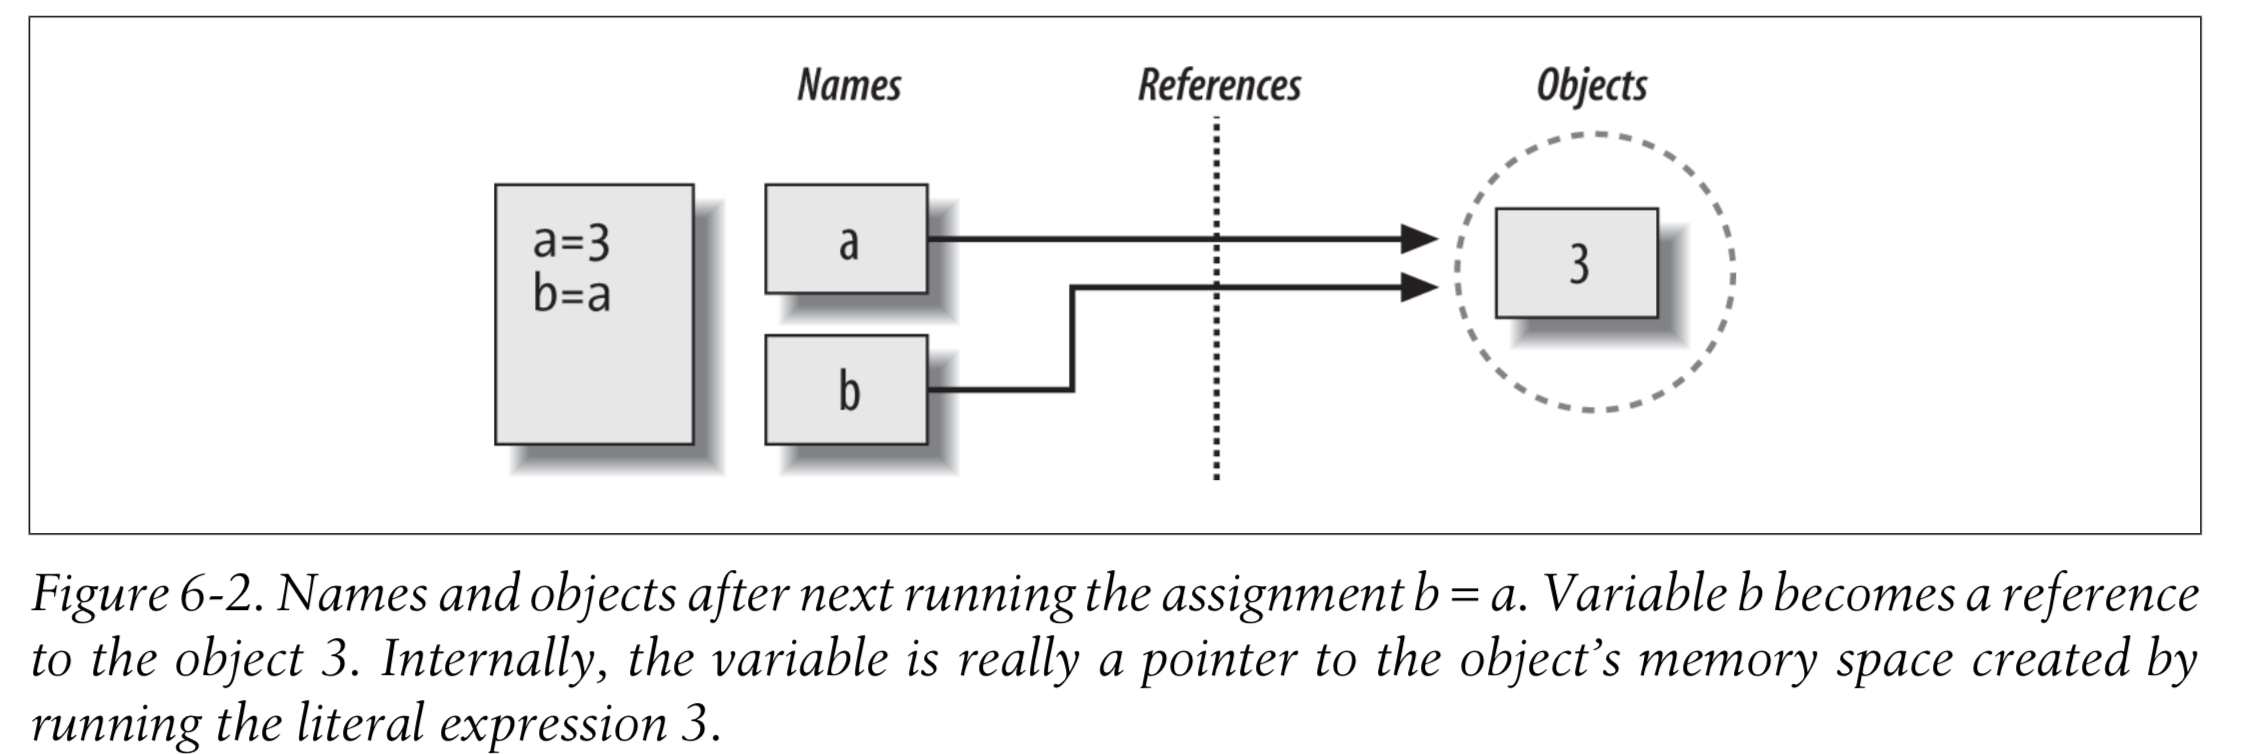

 -- Learning Python 2013
 
A name does not uniquely identify an object!

#### objects are typed, not variables

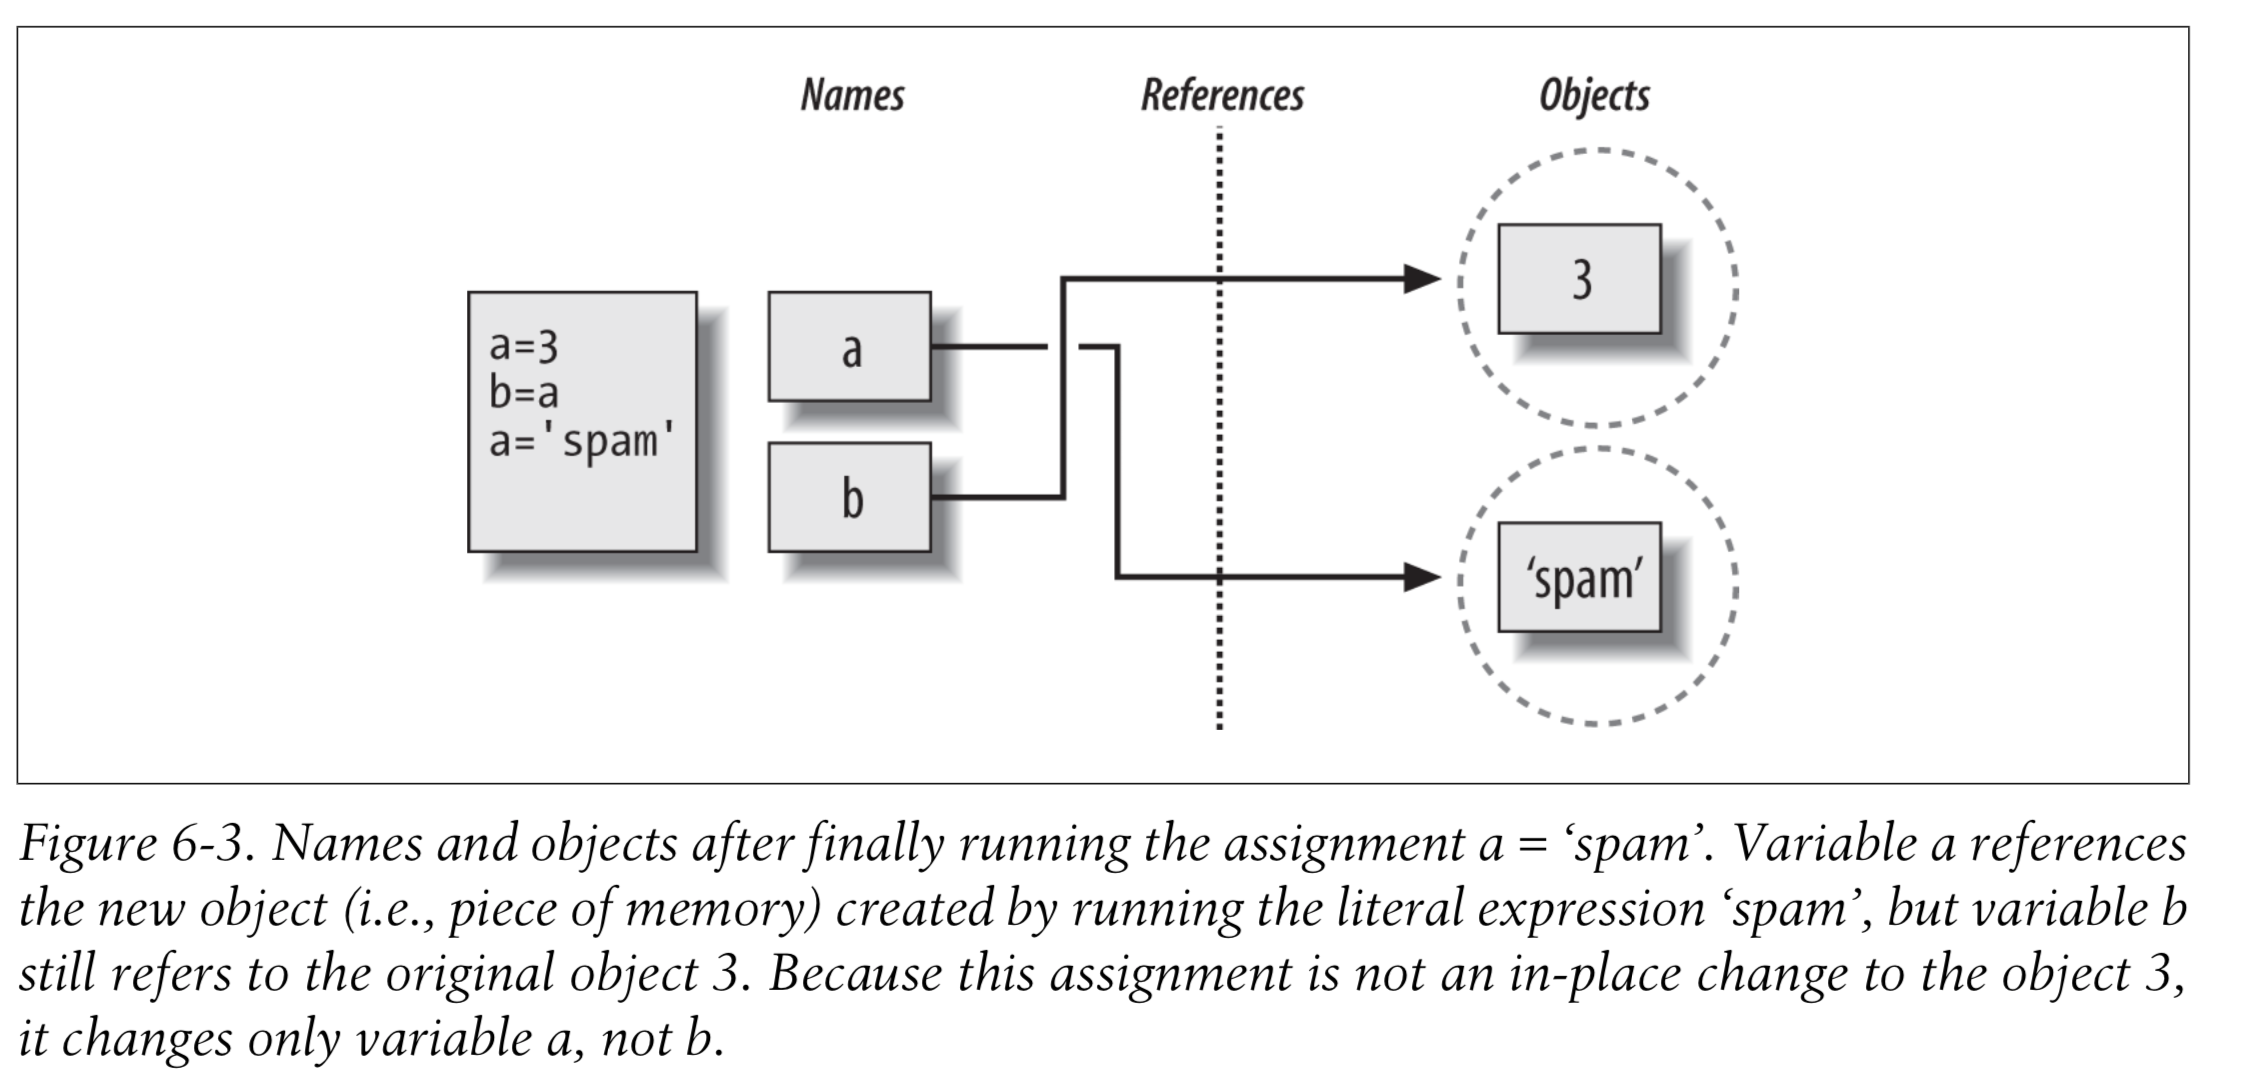
 -- Learning Python 2013

### Shared references

Setting a variable to a new value does not alter the original.

It causes the variable to reference a brand new object.

In [14]:
x = 10
y = x
x = 20
print(x, y)

20 10


In [16]:
# what does this mean for mutable objects?
x = [1, 2, 3]
y = x
y.append(4)
print(x)
print(y)

[1, 2, 3, 4]
[1, 2, 3, 4]


In [ ]:
a = 3
b = a
a *= 2
print(a, b)

In [17]:
a = 3113
id(a)

4425741616

In [18]:
b = 39209328
id(b)

4425741552

In [20]:
id(1)

4347370440

In [21]:
id(1)

4347370440

In [19]:
c = b
id(c)

4425741552

In [22]:
id("hello")

4421355824

In [23]:
id("hello")

4421355824

In [24]:
x = []

In [25]:
y = []

In [26]:
id(x)

4426830976

In [27]:
id(y)

4426547712

#### Identity

The built-in `id(...)` function returns the identity of an object, which is an integer value guaranteed to be unique and constant for lifetime of object

In the CPython Interpeter (the one we are using in this class), it is the address of the memory location storing the object.

In [ ]:
x = "MPCS"
print(id(x)) # Unique integer-value for the object pointed by x

In [28]:
fruit1 = ('Apples', 4)
fruit2 = ('Apples', 4)
fruit3 = fruit2
print(f'Fruit1 id = {id(fruit1)} \n Fruit2 id = {id(fruit2)}')
print(f"Fruit3 id= {id(fruit3)}")

Fruit1 id = 4426067328 
 Fruit2 id = 4426732544
Fruit3 id= 4426732544


#### Equality vs. Identity

Two different ways of testing if objects are the "same":

- Equality operator (`==`): Returns true if two objects are equal (i.e., have the same value)
- Identity operator (`is`): Returns true if two objects identities are the same.

`a is b` means `id(a) == id(b)`

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
print("a == b", a == b)

print(id(a))
print(id(b))
print("a is b", a is b) # The id values are different 

#### `is None`

If you ever need to check if a value is `None`, you'd use `is None` or `is not None`

### list / string example revisited

In [29]:
# list d
d = [1, 2, 3]
print(id(d))
d.append(4)
print(d)
print(id(d))

4426806720
[1, 2, 3, 4]
4426806720


In [32]:
# str D
s = "Hello"
print(id(s))
s += " World"
print(s)

# did s change?
print(id(s))

4426858352
Hello World
4426857072


### Object Creation

    Each time you generate a new value in your script by running an expression, Python creates a new object (i.e., a chunk of memory) to represent that value.
    
-- Learning Python 2013

Not quite! CPython does not guarantee this, and in fact sometimes caches & reuses immutable objects for efficiency.



In [ ]:
a = 1000
b = 1000

# Two different objects, two different ids.
print(a is b)  

#a = 100
#b = 100

# However, for small integer objects, CPython caches them 
# this means that a and b point to the same object 
#print(a is b)

for i in range(200, 300):
    print(i, i is i)

In [35]:
# CPython does the same for short strings 
str1 = 'MPCS' * 100
str2 = 'MPCS' * 100
print(id(str1), id(str2))
str1 is str2 

4424259520 4424259520


True

### Copying

If `y = x` does not make a copy, how can we get one?

We've seen the `.copy()` method on a few of our types.  Which ones?

We can also use the `copy` module:

In [ ]:
x = [1, 2, 3]
y = x.copy()

print(id(x))
print(id(y))

x.append(4)
print(x, y)

In [38]:
# shallow copy example 

x = [[1, 2], [3, 4]]
y = x.copy()  # or copy.copy(x)

print("x is y", x is y)
print("x[0] is y[0]", x[0] is y[0]) 

#print(x, y)
x[0].append(5)
print(x, "\n", y)


x is y False
x[0] is y[0] True
[[1, 2, 5], [3, 4]] 
 [[1, 2, 5], [3, 4]]


In [39]:
# deep copy
import copy
# copy.copy(obj) --> same as obj.copy()
z = copy.deepcopy(x)
print("x[0] is z[0]", x[0] is z[0])

x[0] is z[0] False


### Garbage Collection

Python is a garbage collected language.  

We don't free our own memory, Python does instead.

Behind the scenes, Python stores a reference counter on each `object`.  How many names/objects reference the object.

When reference count drops to zero, Python can reclaim the memory.

## Functions Revisited

A function is a set of statements that can be called more than once.

Benefits of functions:

- Encapsulation: package logic for use in multiple places
- Allows programmer to avoid copy/paste to repeat same task, which helps maximize code reuse and minimize redundancy
- Procedural decomposition: split our program into subtasks (i.e., functions) with separate roles.
- Make life easier for debugging, testing, doing maintenance on code


```python
def function_name(arg1, arg2, arg3):
    """
         Description of function task 

         Inputs: 
             arg1(type): description of arg1 
             arg2: description of arg2
             arg3: description of arg2

         Outputs:
             Description of what this function returns 
    """
    statement1
    statement2
    statement3
    return value  # optional
```

In some languages, you can pass arguments by value or by reference.
In Python all values are "passed by assignment".

```python
def func(a, b):
    ...
    
x = 7
y = [1, 2, 3]
func(x, y)

# you can think of the function starting with assignments to its parameters
a = x
b = y
```

This means mutability determines whether or not a function can modify a parameter in the outer scope.

## I/O

### `print()`

`print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)`

https://docs.python.org/3/library/functions.html#print

In [ ]:
print("Can", "pass", "multiple", {"objects": True})
print("Hello", "World", sep="~~~~", end="!")
print("Same line")

### `input()`

In [ ]:
name = input("What is your name: ")
print(f"Hello {name}")

# always a string
year = input("What year is it: ")
print(year, type(year))

### pathlib

There are a few ways of working with files in Python, mostly due to improvements over time.

You'll still sometimes see code that uses the older method with `open`, but there's almost no reason to write code in that style now that `pathlib` is widely available.

To use `pathlib`, you'll need to import the `Path` object. (We'll discuss these imports more soon.)

In [2]:
from pathlib import Path

Imports like this should be at the top of the file.

To use this type you'll create objects with file paths, for example:

In [5]:
# this looks like a function call
# but the capital letter denotes that this is instead a class
file_path = Path("data/names.txt")

#### Typical workflow:

- Read contents of file(s) from disk into working memory.
- Parse and/or manipulate data as needed.
- (Optional) Write data back to disk with modifications.

#### Other Workflows

- Append-only (e.g. logging)
- Streaming data (needed for large files where we can't fit into memory)

#### Text vs. Binary

We're opening our files in the default, text mode. It is also possible to open files in a binary mode where it isn't assumed we're reading strings.

### Reading From a File

**emails.txt**

```
borja@cs.uchicago.edu
jturk@uchicago.edu
lamonts@uchicago.edu
```

In [7]:
# to access a file's contents, we create the path, and then
# use read_text()
emails_path = Path("data/emails.txt")
emails = emails_path.read_text()

data/emails.txt


### Writing to a File

We need to open the file with write or append permissions.

In [22]:
names_file = Path("data/animals.txt").open("w")
names_file.write("Aardvark\nChimpanzee\nElephant\n")

# (the ! indicates this is is a shell command, not Python)
!cat data/animals.txt

───────┬────────────────────────────────────────────────────────────────────────
       │ File: data/animals.txt   <EMPTY>
───────┴────────────────────────────────────────────────────────────────────────


In [23]:
# open("w") erases the file, use "a" if you want to append
names_file = Path("data/animals.txt").open("a")
names_file.write("Kangaroo\n")
names_file.flush()
!cat data/animals.txt

───────┬────────────────────────────────────────────────────────────────────────
       │ File: data/animals.txt
───────┼────────────────────────────────────────────────────────────────────────
   1   │ Aardvark
   2   │ Chimpanzee
   3   │ Elephant
   4   │ Kangaroo
───────┴────────────────────────────────────────────────────────────────────────


#### `flush` and `close`

`flush` ensures that the in-memory contents get written to disk, actually saved.

(Analogy: program crashes and you lose your unsaved work)

At the end, important to `close` the file.

- Frees resources.
- Allows other programs to access file contents.
- Ensures edits are written to disk.

### `with`

The file object is a "context manager", we'll cover those in more detail in a few weeks.

The `with` statement allows us to safely use files without fear of leaving them open.

```python

with path.open() as variable:
    statement1
    statement2
```

No matter what happens inside `with` block, the file will be closed.

In [ ]:
f = open("names.txt", "w")
f.write("Bob\n")
f.write("Phil\n")
1 / 0

In [ ]:
!cat names.txt

In [ ]:
# Full Example

# load data into our chosen data structure
emails = []
with open("data/emails.txt") as f:
    for email in f:
        emails.append(email)                
print(emails)

In [ ]:
# transform data
cnet_ids = []
for email in emails:
    cnet_id, domain = email.split("@")
    cnet_ids.append(cnet_id)
print(cnet_ids)

In [ ]:
# write new data
with open("data/cnetids.txt", "w") as f:
    for cnet_id in cnet_ids:
        # print() adds newlines by default
        print(cnet_id, file=f)    
        # or
        #f.write(cnet_id + "\n")
        
!cat data/cnetids.txt

#### Useful `file` Methods

| Operation | Purpose |
|-----------|---------|
| `f.read()` | Read entire file & return contents. |
| `f.read(N)` | Read N characters (or bytes). |
| `f.readline()` | Read up to (and including) next newline. |
| `f.readlines() ` | Read entire file split into list of lines. |
| `f.write(aStr)` | Write string `aStr` into file. |
| `f.writelines(lines)` | Write list of strings into file. |
| `f.close()` | Close file, prefer `with open()` instead. |
| `f.flush()` | Manually flush output to disk without closing. |
| `f.seek(N)` | Move cursor to position N. |

-- Table based on Learning Python 2013

### Common Gotchas

- Relative paths - use `pathlib` https://docs.python.org/3/library/pathlib.html
- File permissions
- Mind file mode (read/write/append)

### Note: Relative Paths

You may find that if you are running your code from, for example, the homework1 directory instead of homework1/problem3, you'd need to modify this path to be `Path("problem3/towing.csv")`.

That is because by default, paths are *relative*, meaning that they are assumed to start in the directory that you are running your code from.

This can be frustrating at first, you want your code to work the same regardless of what directory you are in.

### Building an absolute path

To get around this, you can construct an absolute path:

First you can use the special `__file__` variable which always contains the path to the current file.

Then you can use that as the "anchor" of your path, and navigate from there.

A common pattern then is to get the current file's parent, and navigate from there:

```python
from pathlib import Path

path = Path(__file__).parent / "towing.csv"
```

This line uses the special built-in variable `__file__` to get the path of the Python file itself.
It then gets this file's parent directory (`.parent`) and appends the filename "towing.csv" to it.

Using this technique in your code allows you to set paths that don't depend on the current working directory.

